# Kolmogorov-Smirnoff Test (KS-Test) Example
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/ks_test.ipynb)


Demonstration of the KS-Test for comparing two distributions.

In [15]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl
# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

Let's grab a sample of length 1000 from a normal distribution that is _not standard normal_. That is, the mean is a little bit bigger than zero.

In [16]:
# Setup our sample
# underlying normal population, mean = 0.05, sigma = 1, N = 1000 
mu_sample = .05
sigma_sample = 1.
N_sample = 1000

x_sample = np.random.normal(mu_sample,sigma_sample,N_sample)

Now let's bin our sampled data so we can make a plot.

In [17]:
#define the bins
x = np.arange(-10,10,.1)

# bin sample data
hist, bin_edges = np.histogram(x_sample,x, density=True)

# make plot of a true normal
z = stats.norm.pdf(x,0,1)

Now we can plot the sample distribution and the distribution of a true normal just so we can compare by eye.

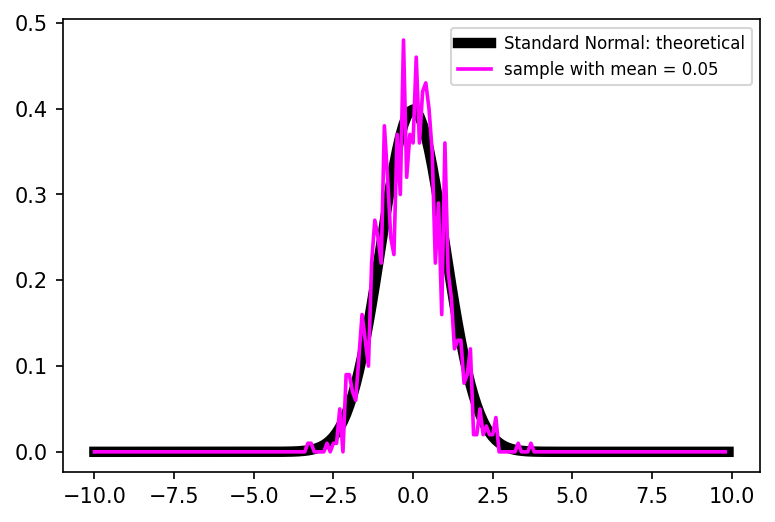

In [18]:
plt.figure()
plt.plot(x,z,color = 'black', label = 'Standard Normal: theoretical', linewidth = 5)
plt.plot(bin_edges[:-1],hist,color = 'fuchsia', label = 'sample with mean = ' + str(mu_sample), linewidth = 1.75)

plt.legend(fontsize = 8)
plt.show()

When we compare our sample distribution with that of a true normal, what do we find? We can use the KS-test to do this comparision.

Max. Differnece = 0.021543278684208855, p-value = 0.7421658046436856


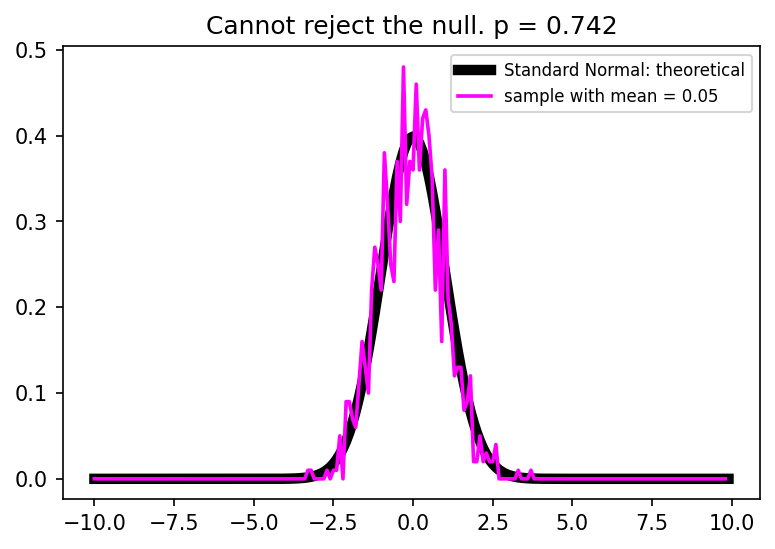

In [19]:
plt.figure()
plt.plot(x,z,color = 'black', label = 'Standard Normal: theoretical', linewidth = 5)
plt.plot(bin_edges[:-1],hist,color = 'fuchsia', label = 'sample with mean = ' + str(mu_sample), linewidth = 1.75)

plt.legend(fontsize = 8)

# compare our data sample with a TRUE normal
D, p = stats.kstest(x_sample,'norm')
print('Max. Differnece = ' + str(D) + ', p-value = ' + str(p))

# add results to the plot
if(p<0.05):
    plt.title('Reject the null. p = ' + str(round(p, 3)))
else:
    plt.title('Cannot reject the null. p = ' + str(round(p, 3)))
plt.show()    


Note that our p-value is above 0.05, so assuming we are using a 95%, two-tailed limit, we cannot reject our null hypothesis that our sampled data came from a standard normal (even though we _know_ that it didn't come from a standard normal!). That is, the KS-test cannot reject the null hypothesis. 

What if instead our sample came from a normal distribution with mean 0.1?

In [20]:
mu_sample = .1
sigma_sample = 1.
N_sample = 1000

x_sample2 = np.random.normal(mu_sample,sigma_sample,N_sample)

Applying the KS-test to this dataset leads to...

Max. Differnece = 0.05168103506230737, p-value = 0.009231099793639315


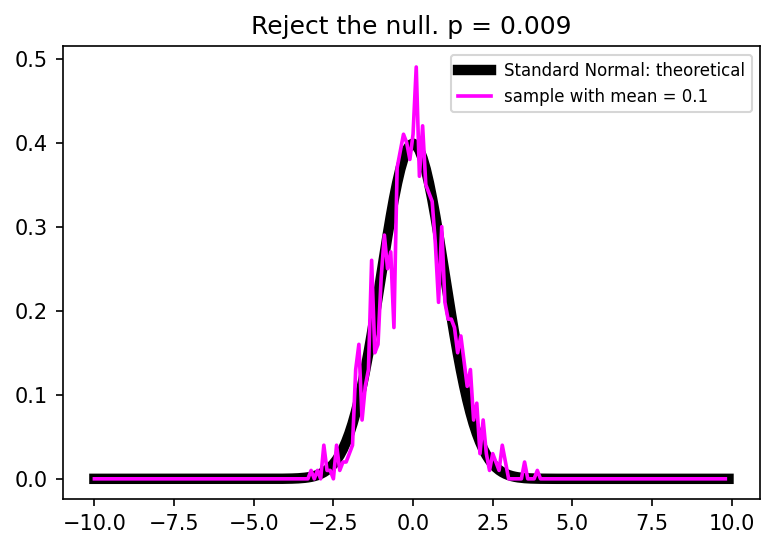

In [21]:
# bin sample data
hist, bin_edges = np.histogram(x_sample2,x, density=True)

plt.figure()
plt.plot(x,z,color = 'black', label = 'Standard Normal: theoretical', linewidth = 5)
plt.plot(bin_edges[:-1],hist,color = 'fuchsia', label = 'sample with mean = ' + str(mu_sample), linewidth = 1.75)

plt.legend(fontsize = 8)

# compare our data sample with a TRUE normal
D, p = stats.kstest(x_sample2,'norm')
print('Max. Differnece = ' + str(D) + ', p-value = ' + str(p))

# add results to the plot
if(p<0.05):
    plt.title('Reject the null. p = ' + str(round(p, 3)))
else:
    plt.title('Cannot reject the null. p = ' + str(round(p, 3)))
plt.show()    


Note that now our p-value is well below 0.05, so the KS-test tells us to reject the null hypothesis that our data came from a standard normal.

#### Seeing how the KS-Test works

Let's see how the KS-test works. We will make the difference a bit more extreme so that you can see it by eye.

In [22]:
mu_sample = .25
sigma_sample = 1.
N_sample = 1000

x_sample2 = np.random.normal(mu_sample,sigma_sample,N_sample)

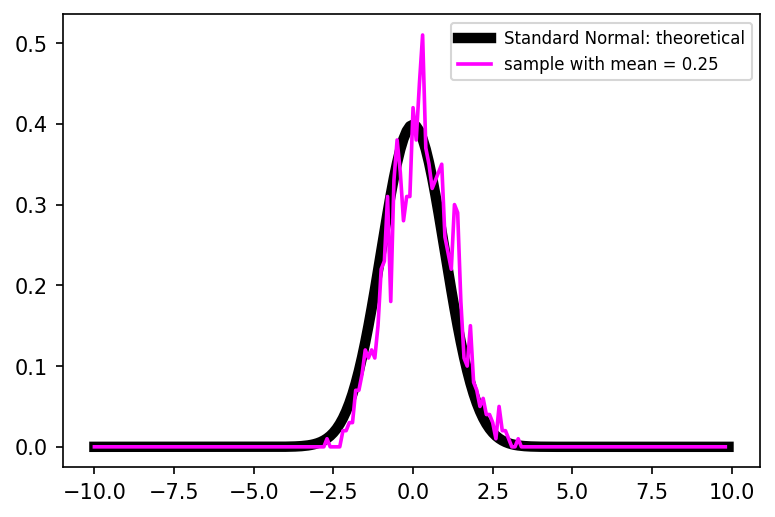

In [23]:
# bin sample data
hist, bin_edges = np.histogram(x_sample2,x, density=True)

plt.figure()
plt.plot(x,z,color = 'black', label = 'Standard Normal: theoretical', linewidth = 5)
plt.plot(bin_edges[:-1],hist,color = 'fuchsia', label = 'sample with mean = ' + str(mu_sample), linewidth = 1.75)
plt.legend(fontsize = 8)
plt.show()

Step 1: Make a plot of the CDFs of our sample and a true standard normal and plot them.

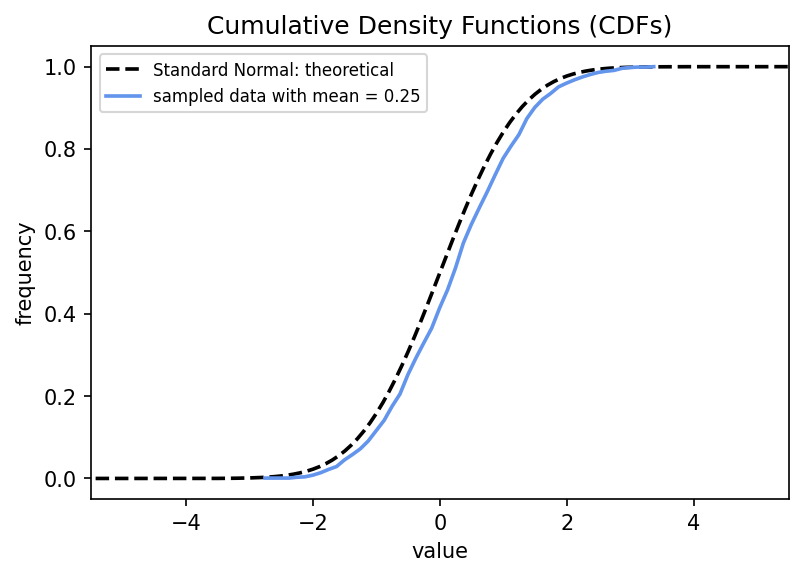

In [24]:
#get the true CDF of a standard normal
zc = stats.norm.cdf(x,0,1)

# calculate the CDF of our actual data - here I use the cumulative frequency and make it myself
x2c = stats.cumfreq(x_sample2, numbins = 50)
# this just gets my binning for the sample CDF
y = x2c.lowerlimit + np.linspace(0, x2c.binsize*x2c.cumcount.size,x2c.cumcount.size) 

# make a plot
plt.figure()
plt.plot(x,zc,'--',color = 'black',label = 'Standard Normal: theoretical', linewidth = 1.75)
plt.plot(y,x2c.cumcount/len(x_sample2),color = 'cornflowerblue', label = 'sampled data with mean = ' + str(mu_sample), linewidth = 1.75)

plt.xlim(-5.5,5.5)
plt.xlabel('value')
plt.ylabel('frequency')

plt.legend(fontsize = 8, loc = 'upper left')
plt.title('Cumulative Density Functions (CDFs)')

plt.show()

Step 2: Find the location of the biggest difference.

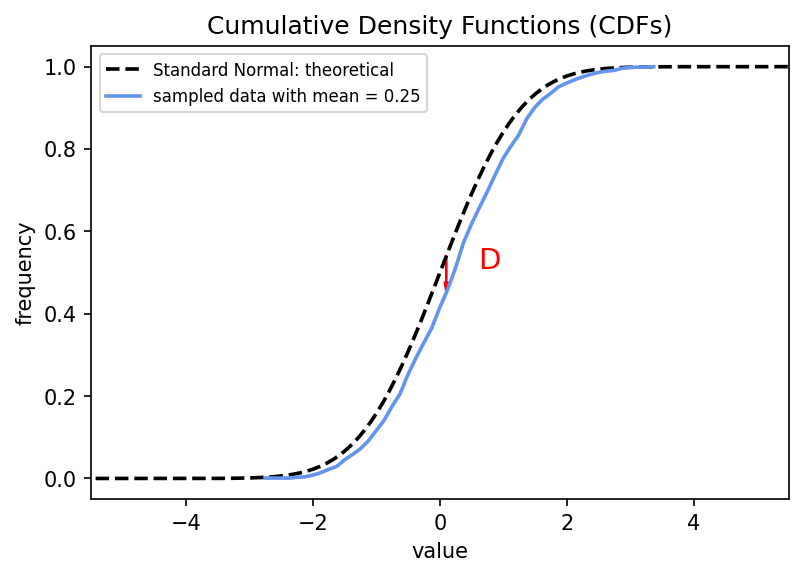

In [25]:
plt.figure()
plt.plot(x,zc,'--',color = 'black',label = 'Standard Normal: theoretical', linewidth = 1.75)
plt.plot(y,x2c.cumcount/len(x_sample2),color = 'cornflowerblue', label = 'sampled data with mean = ' + str(mu_sample), linewidth = 1.75)

plt.xlim(-5.5,5.5)
plt.xlabel('value')
plt.ylabel('frequency')

plt.legend(fontsize = 8, loc = 'upper left')
plt.title('Cumulative Density Functions (CDFs)')

# need to first interpolate the black and red curves to the same grid
xinterp = np.arange(-5,5,.1)
x2c_interp = np.interp(xinterp,y,x2c.cumcount/len(x_sample2), right = 1.0)
zc_interp = np.interp(xinterp,x,zc,right = 1.0)

# calculate the CDF difference at each bin
diff_vec = np.abs(x2c_interp - zc_interp)
# find the maximum difference
i = np.argmax(diff_vec)

# add results to the plot
plt.arrow(xinterp[i],zc_interp[i],0.0,x2c_interp[i] - zc_interp[i], length_includes_head = True, 
         head_width=0.05, head_length=0.025, fc='red', ec='red')
plt.text(xinterp[i+5],zc_interp[i] + (x2c_interp[i] - zc_interp[i])/3.,'D', fontsize = 14, color = 'red')

plt.show()

#### Comparing two samples with the KS-Test

This is all nice, but what if you want to instead compare TWO samples (rather than one sample to a true population)? An example of this is shown below comparing a sampled standard normal and a sampled t-distribution. You just need to use a 2-sample KS-test.

In [26]:
# setup the data
N = 500
xint = np.arange(-4.,4.,.25)
nu = 100

x1 = np.random.normal(0.,1.,size=N) #standard normal with 500 values
x2 = stats.t.rvs(nu,size=N) #t-distribution of 500 values for nu=100

In [27]:
# apply the two-sample KS-test
D, p = stats.ks_2samp(x2,x1)
print(D,p)

0.048 0.6126241113875229


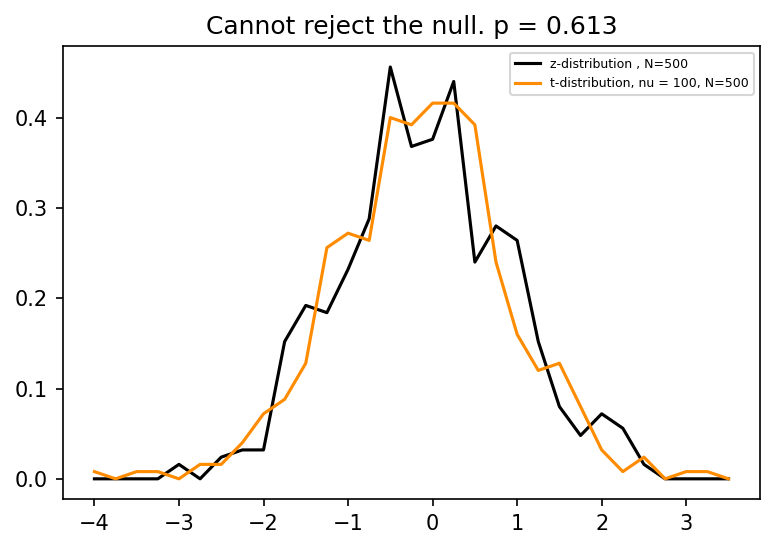

In [28]:
# plot the data
plt.figure()

hist, bin_edges = np.histogram(x1,xint, density=True)
plt.plot(bin_edges[:-1],hist,color = 'black', label = 'z-distribution '  +', N=' + str(N))

hist, bin_edges = np.histogram(x2,xint, density=True)
plt.plot(bin_edges[:-1],hist,color = 'darkorange', label = 't-distribution, nu = ' + str(nu) +', N=' + str(N))

plt.legend(fontsize = 6)

if(p<0.05):
    plt.title('Reject the null. p = ' + str(round(p, 3)))
else:
    plt.title('Cannot reject the null. p = ' + str(round(p, 3)))

plt.show()

According to this test, with $N=500$ the normal distribution cannot be distinguished from the t-distribution with degrees of freedom = 100.

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/ks_test.ipynb*